In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("C:/Users/Shailendar/Desktop/rounak/DATASETS/1730285881-Airbnb_Open_Data.xlsx")

In [4]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [6]:
# checking duplicacy
data.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [7]:
# removing duplicated values
data.drop_duplicates(inplace=True)

In [8]:
#checking the results
data.duplicated().value_counts()

False    102058
Name: count, dtype: int64

In [9]:
# drop house_rules and licese cols with insufficient data 
data.drop(['house_rules','license'],axis=1,inplace=True,errors='ignore')

#renaming the above cells with adding $ sign for clarity
data.rename(columns={'price':'price_$','service fee':'service fee_$'},inplace=True)

# Convert the columns to string type to ensure .str accessor works
data['price_$'] = data['price_$'].astype(str)
data['service fee_$'] = data['service fee_$'].astype(str)

# Now, remove the dollar signs and commas
data['price_$'] = data['price_$'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
data['service fee_$'] = data['service fee_$'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert the cleaned columns to a numeric type for calculations
# errors='coerce' will turn any non-numeric values into NaN (Not a Number)
data['price_$'] = pd.to_numeric(data['price_$'], errors='coerce')
data['service fee_$'] = pd.to_numeric(data['service fee_$'], errors='coerce')

# You can now check the data types to confirm
print(data[['price_$', 'service fee_$']].dtypes)



#dropping all the missing value records
data.dropna(inplace=True)

#changing the mismatched data types to appropriate one-
data['price_$']=data['price_$'].astype(float)
data['service fee_$']=data['service fee_$'].astype(float)
data['id']=data['id'].astype(str)
data['host id']=data['host id'].astype(str)
data['last review']=pd.to_datetime(data['last review'])
data['Construction year']=data['Construction year'].astype(int)



price_$          float64
service fee_$    float64
dtype: object


In [10]:
data.duplicated().value_counts()

False    83390
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  object        
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  object        
 3   host_identity_verified          83390 non-null  object        
 4   host name                       83390 non-null  object        
 5   neighbourhood group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country code                    83390 non-null  object        
 11  instan

In [12]:
# removing outliers in the availability 365 colmn data
data= data.drop(data[data['availability 365'] > 500].index)


In [13]:
data.duplicated().value_counts()

False    83389
Name: count, dtype: int64

# 1.Different property types in dataset #


In [15]:

property_types = data['room type'].value_counts().to_frame()

In [16]:
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


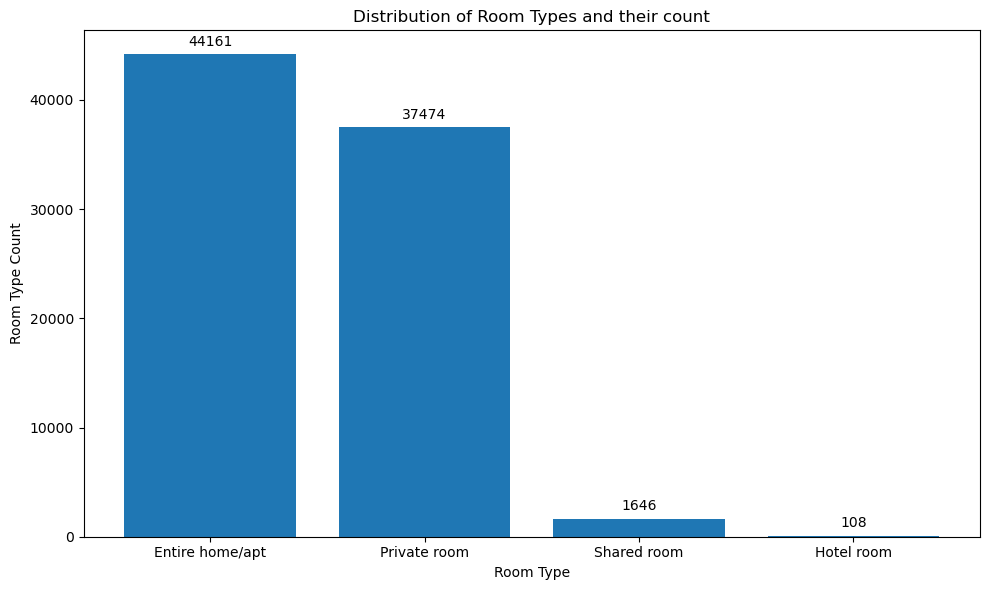

In [17]:
plt.figure(figsize=(10, 6))
bars = plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(bars,labels=property_types.loc[:,"count"],padding=4);
# Add labels and a title
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Distribution of Room Types and their count')

# Ensure everything fits and save the plot
plt.tight_layout()
plt.savefig('room_type_distribution.png')

Therefore the different property type is --->
1.Entire home/apartment
2.Private Room
3.Shared Room
4.Hotel Room

# 2. Which neighbourhood has highest number of listings?

In [62]:
neigh_group=data['neighbourhood group'].value_counts().to_frame()
neigh_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


In [58]:
#renaming the wrong brooklyn
data.loc[data['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

In [64]:
neigh_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


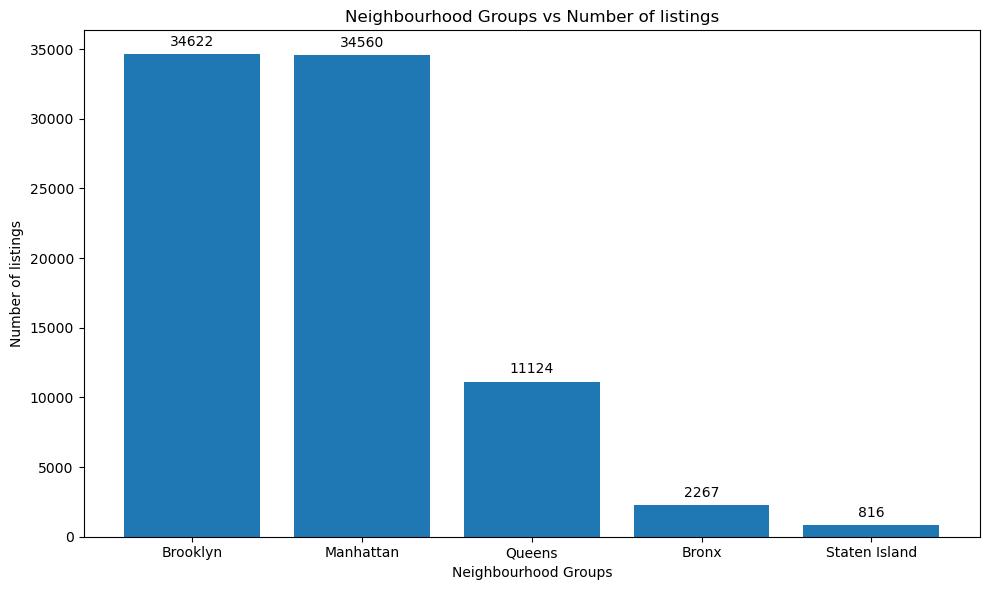

In [66]:
plt.figure(figsize=(10, 6))
hood_group_bars = plt.bar(neigh_group.index,neigh_group.loc[:,"count"]);
plt.bar_label(hood_group_bars,labels=neigh_group.loc[:,"count"],padding=4);
# Add labels and a title
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of listings');
plt.title('Neighbourhood Groups vs Number of listings');

# Ensure everything fits the plot
plt.tight_layout()

In [ ]:
Therefore the above plot shows the number of listings in the neighbourhood.


# 3. Which neighbourhood have the highest average prices for Airbnb listings ?

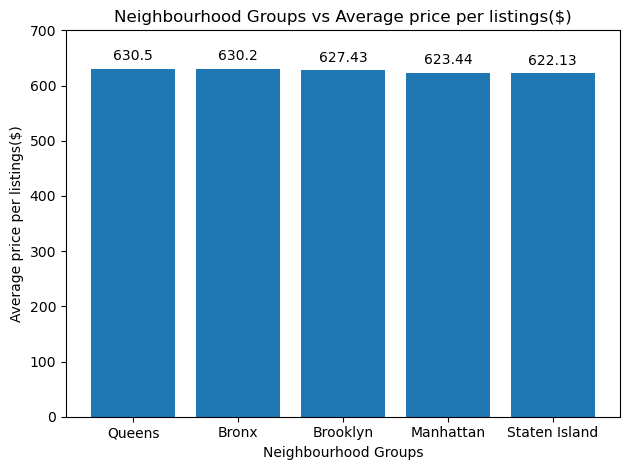

In [24]:
avg_price=data.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4);
# Add labels and a title
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Average price per listings($)');
plt.title('Neighbourhood Groups vs Average price per listings($)');

# Ensure everything fits the plot
plt.tight_layout()


In [ ]:
Queens has the highest average prices for Airbnb listings.

# 4.Is their a relationship between the construction year of property and price ? 


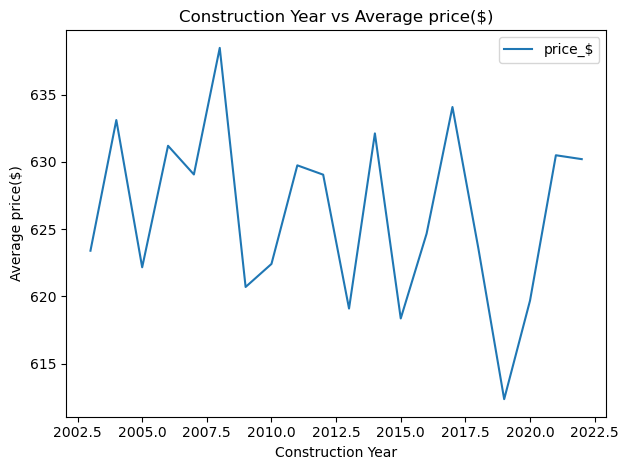

In [26]:
data.groupby(data['Construction year'])['price_$'].mean().to_frame().plot();
# Add labels and a title

plt.xlabel('Construction Year');
plt.ylabel('Average price($)');
plt.title('Construction Year vs Average price($)');

# Ensure everything fits the plot
plt.tight_layout()


In [ ]:
The Line plot the construction year of properties versus the average price per property reveal noticeable downward trend in prices as the construction years progress the pattern demonstrates decreasing lows and highs suggesting and overall decline in property as time progressive

# 5.top 10 hosts by calculating host listing count

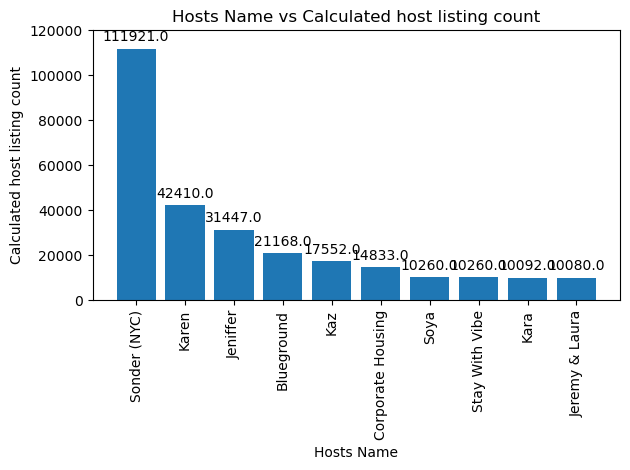

In [28]:
hosts=data.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(host_bar,labels=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
# Add labels and a title
plt.ylim([0,120000]);
#plt.xlim(right=hosts['calculated host listings count'].max() * 0.1)
plt.xlabel('Hosts Name');
plt.ylabel('Calculated host listing count');
plt.title('Hosts Name vs Calculated host listing count');
plt.xticks(rotation=90);

# Ensure everything fits the plot
plt.tight_layout()


In [ ]:
The above graph shows the top 10 Host names with their listing counts respectively.

# 6.Are hosts with verified identities more likely to recieve positive reviews?


In [30]:
review=data.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


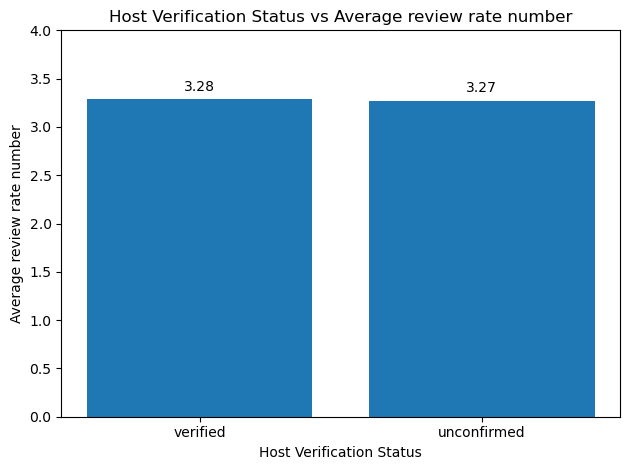

In [31]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),label_type='edge',padding=4);
# Add labels and a title
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average review rate number');
plt.title('Host Verification Status vs Average review rate number');

# Ensure everything fits the plot
plt.tight_layout()


In [ ]:
The average review rates for verified and unconfirmed hosts are 3.27 and 3.28 respectively indicating a marginal difference in their review rates with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not surely more likely to receive positive reviews as compare to confirm the unconfirmed hosts.

# 7. Is there a correlation between the price of listing and its service fee ?

In [33]:
data['price_$'].corr(data['service fee_$'])

0.999990908297645

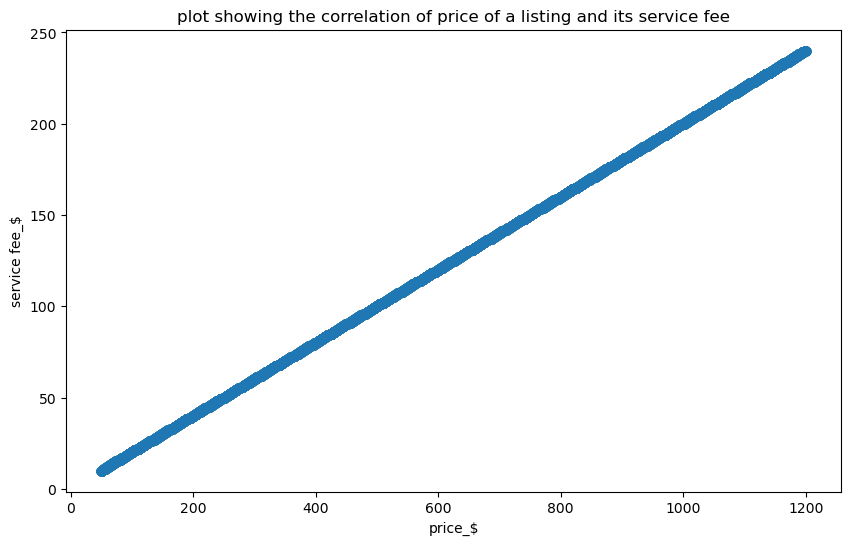

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(data,x='price_$',y='service fee_$');
plt.xlabel('price_$');
plt.ylabel('service fee_$');
plt.title('plot showing the correlation of price of a listing and its service fee');

In [ ]:
The price of listing and its service fee are highly correlated to each other.

# 8.What is the average review rate number(eg: stars)for listing and does it veay based on the neighbourhood group and room type?

In [36]:
arrn=data.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arrn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

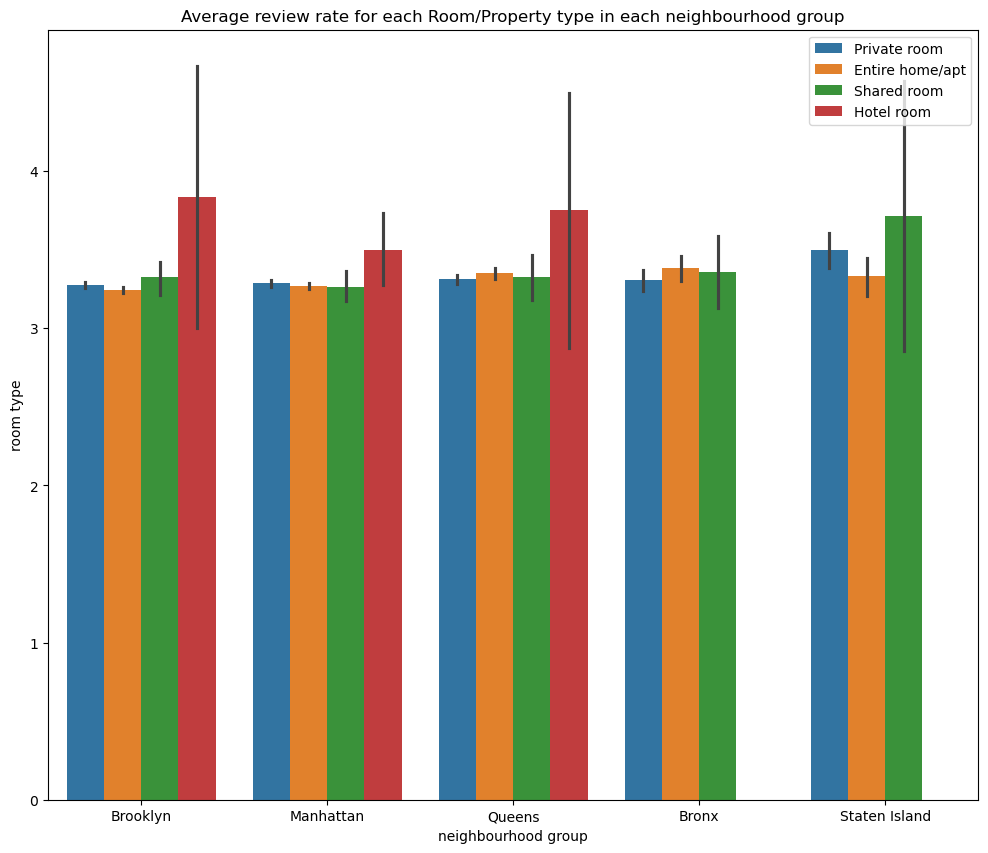

In [37]:
 plt.figure(figsize=(12,10))
sns.barplot(data=data,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('neighbourhood group');
plt.ylabel('room type');
plt.title('Average review rate for each Room/Property type in each neighbourhood group');
plt.legend()

hotel rooms exhibits has higher review rates compared to all other property types within the three neighbourhood groups where they are located Brooklyn, Manhattan and Queens.

# 9.Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year ?


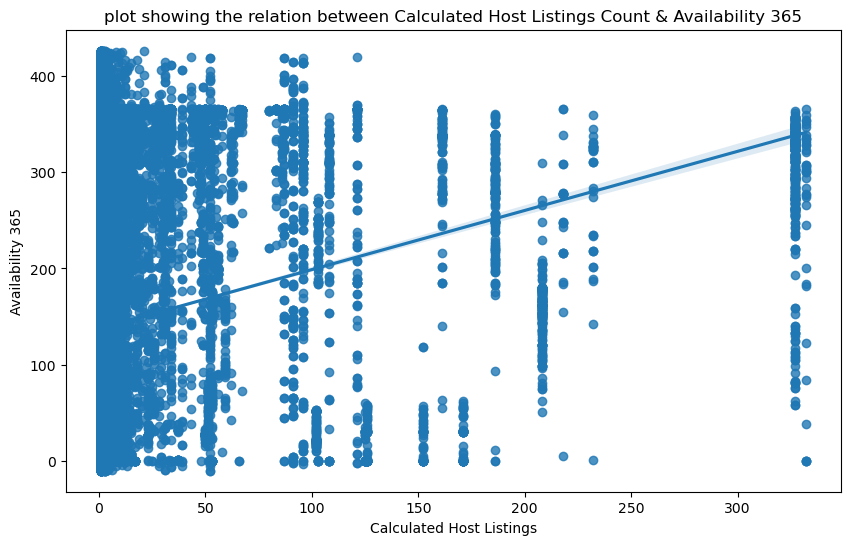

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(data,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('plot showing the relation between Calculated Host Listings Count & Availability 365');

In [43]:
data['calculated host listings count'].corr(data['availability 365'])

0.13599714715703334

The Pearson correlation Coefficient for the association between calculator post listing and availability 365 is 0.136 indicating a week positive correlation between two variables.